In [124]:
import os
import pandas as pd
import numpy as np

In [125]:
os.getcwd()

'G:\\Mi unidad\\Proyectos de analítica en Python\\Machine Learning para Business Intelligence\\Clase 7\\Data'

In [126]:
os.chdir("G:\Mi unidad\Proyectos de analítica en Python\Machine Learning para Business Intelligence\Clase 7\Data")

In [127]:
os.listdir()

['heart.csv', 'heart_noised.csv', 'lugares.csv', 'desktop.ini']

In [128]:
# Heart
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [130]:
variables_continua = ["age", "trestbps", "chol", 'oldpeak', 'thalach']
variables_dicotomas = ["sex", "fbs", "exang", "target"]
variables_categoricas = ["cp", "restecg", "slope", "ca", "thal"]

In [131]:
np.random.seed(666)
df_clean = df.copy()
variables = df.columns
for i in range(6000):
    fila_i = np.random.randint(low = 0, high = df.shape[0])
    fila_j = np.random.randint(low = 0, high = df.shape[0])
    columna = np.random.randint(low = 0, high = df.shape[1])
    v_i = df.iloc[fila_i, columna]
    v_j = df.iloc[fila_j, columna]
    variable = variables[columna]
    if variable in variables_continua:
        mu = df.iloc[:, columna].mean()
        sigma = df.iloc[:, columna].std()
        v_i = (v_i + np.random.normal(loc = mu, scale = sigma))/2
        v_j = (v_j + np.random.normal(loc = mu, scale = sigma))/2
        df.iloc[fila_i, columna] = v_j
        df.iloc[fila_j, columna] = v_i
    elif variable in variables_dicotomas:
        v_i = np.abs(v_i - 1)
        v_j = np.abs(v_j - 1)
        df.iloc[fila_i, columna] = v_i
        df.iloc[fila_j, columna] = v_j
    elif variable in variables_categoricas:
        df.iloc[fila_i, columna] = v_j
        df.iloc[fila_j, columna] = v_i
    else:
        print("WARNING!")
        print(variable)

In [135]:
df_clean.loc[0:1,]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [136]:
df.loc[0:1,]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60.095337,1,0,140.941653,212.000000,0,1,168.0,0,1.981332,2,2,2,1
1,53.000000,0,0,139.388777,229.566921,1,1,155.0,1,0.663821,2,1,2,1


In [139]:
df_clean.target.value_counts(normalize = True)

1    0.513171
0    0.486829
Name: target, dtype: float64

In [138]:
df.target.value_counts(normalize = True)

0    0.508293
1    0.491707
Name: target, dtype: float64

In [140]:
df.to_csv("heart_noised.csv", index = False)

In [ ]:
pip install pandas_profiling

In [143]:
import ydata_profiling as pp

In [141]:
import pandas_profiling as pp

C:\Users\Lucas\AppData\Local\Temp\ipykernel_17236\1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [156]:
pp.ProfileReport(df, dark_mode = True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [146]:
reporte = pp.ProfileReport(df)

In [153]:
reporte.to_file("Analysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [228]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis = 1)
y = df["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,60.095337,1,0,140.941653,212.000000,0,1,168.000000,0,1.981332,2,2,2
1,53.000000,0,0,139.388777,229.566921,1,1,155.000000,1,0.663821,2,1,2
2,70.000000,1,0,145.000000,217.340620,0,0,125.000000,0,2.600000,0,0,3
3,60.509590,1,0,138.793726,224.543604,0,1,142.306920,0,0.000000,1,1,3
4,60.265636,1,0,138.000000,294.000000,1,1,130.872092,1,0.731261,1,0,3


In [229]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: target, dtype: int64

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [231]:
from sklearn.preprocessing import StandardScaler

In [232]:
scaler = StandardScaler()

X_train[variables_continua] = scaler.fit_transform(X_train[variables_continua])
X_test[variables_continua] = scaler.transform(X_test[variables_continua])

In [233]:
X_train.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,820.00,820.00,820.00,820.00,820.00,820.00,820.00,820.00,820.00,820.00,820.00,820.00,820.00
mean,-0.00,0.55,0.94,-0.00,0.00,0.40,0.53,0.00,0.48,-0.00,1.38,0.77,2.32
std,1.00,0.50,1.03,1.00,1.00,0.49,0.53,1.00,0.50,1.00,0.61,1.04,0.61
min,-2.89,0.00,0.00,-2.60,-2.95,0.00,0.00,-4.08,0.00,-1.95,0.00,0.00,0.00
25%,-0.65,0.00,0.00,-0.74,-0.61,0.00,0.00,-0.56,0.00,-0.79,1.00,0.00,2.00
50%,0.05,1.00,1.00,-0.09,-0.05,0.00,1.00,0.07,0.00,-0.09,1.00,0.00,2.00
75%,0.67,1.00,2.00,0.61,0.59,1.00,1.00,0.70,1.00,0.57,2.00,1.00,3.00
max,3.00,1.00,3.00,4.79,7.97,1.00,2.00,2.80,1.00,5.52,2.00,4.00,3.00


In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [235]:
tree1 = DecisionTreeClassifier(random_state = 123)
grilla_tree1 = {"max_depth": [3, 5, 7, 9, 11, 13, 15, 17]}

tree2 = DecisionTreeClassifier(random_state = 123)
grilla_tree2 = {"max_leaf_nodes": [3, 5, 7, 9, 11, 13, 15, 17]}

In [236]:
tree_cv1 = GridSearchCV(tree1, grilla_tree1, scoring = "roc_auc", cv = 5, return_train_score = True)
tree_cv1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17]},
             return_train_score=True, scoring='roc_auc')

In [237]:
tree_cv2 = GridSearchCV(tree2, grilla_tree2, scoring = "roc_auc", cv = 5, return_train_score = True)
tree_cv2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_leaf_nodes': [3, 5, 7, 9, 11, 13, 15, 17]},
             return_train_score=True, scoring='roc_auc')

In [238]:
tree_cv1.best_params_

{'max_depth': 3}

In [239]:
tree_cv1.best_score_

0.5240290815693367

In [240]:
tree_cv2.best_params_

{'max_leaf_nodes': 15}

In [241]:
tree_cv2.best_score_

0.5346776052193029

In [242]:
cv_tree_results1 = pd.DataFrame(tree_cv1.cv_results_)
cv_tree_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004018,0.001598,0.002317,0.000396,3,{'max_depth': 3},0.514881,0.529836,0.519136,0.532316,...,0.524029,0.006481,1,0.646627,0.634912,0.643100,0.609328,0.577598,0.622313,0.025885
1,0.003981,0.000755,0.002628,0.000628,5,{'max_depth': 5},0.494271,0.553571,0.492182,0.525316,...,0.512487,0.023806,4,0.767241,0.750412,0.756233,0.736203,0.645529,0.731123,0.043953
2,0.003966,0.000603,0.001914,0.000528,7,{'max_depth': 7},0.535193,0.508408,0.494341,0.560164,...,0.521781,0.023262,2,0.908690,0.863106,0.886420,0.842591,0.690852,0.838332,0.077000
3,0.004514,0.000908,0.002653,0.000600,9,{'max_depth': 9},0.517560,0.459970,0.492182,0.513626,...,0.496772,0.020522,8,0.973596,0.941775,0.970461,0.923016,0.742883,0.910346,0.085798
4,0.004650,0.000812,0.002009,0.000012,11,{'max_depth': 11},0.509077,0.482366,0.515786,0.524348,...,0.509770,0.014536,5,0.994035,0.983711,0.995534,0.977285,0.795458,0.949205,0.077167


Text(0, 0.5, 'AUC')

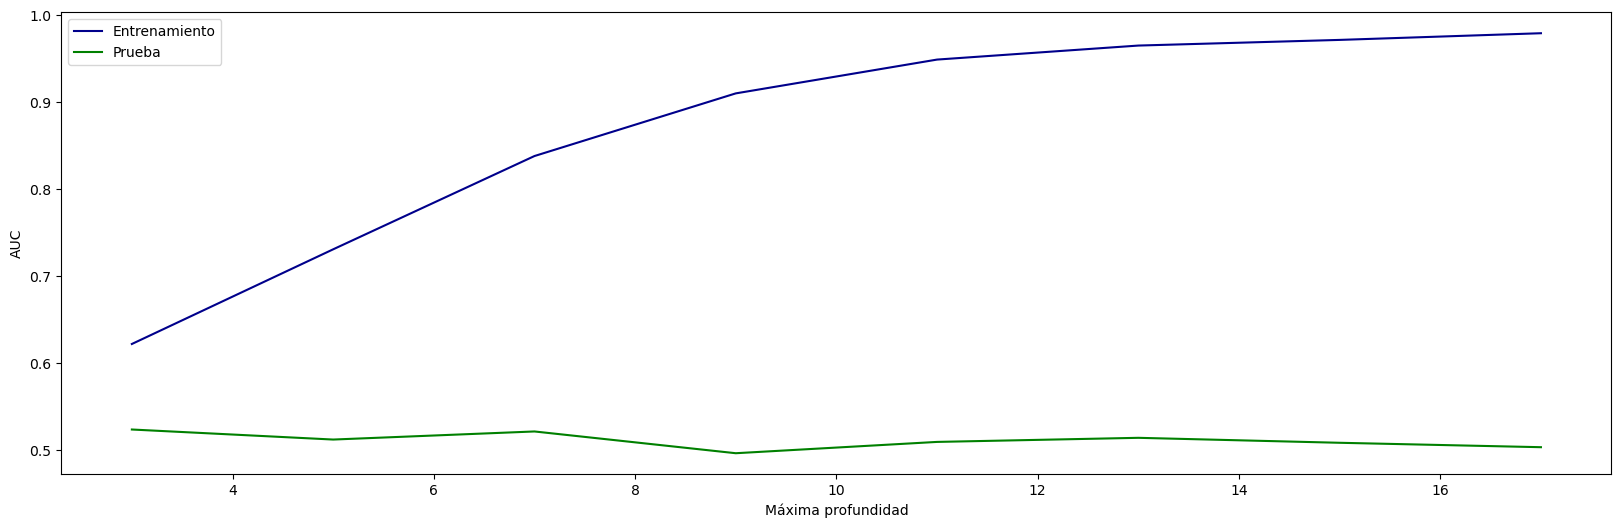

In [243]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize = (20, 6))
sns.lineplot(data = cv_tree_results1, x = "param_max_depth", y = "mean_train_score", color = "darkblue", label = "Entrenamiento")
sns.lineplot(data = cv_tree_results1, x = "param_max_depth", y = "mean_test_score", color = "green", label = "Prueba")
ax.set_xlabel("Máxima profundidad")
ax.set_ylabel("AUC")

In [244]:
cv_tree_results2 = pd.DataFrame(tree_cv2.cv_results_)
cv_tree_results2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003614,0.000739,0.002419,0.000574,3,{'max_leaf_nodes': 3},0.507589,0.528571,0.502681,0.523455,...,0.517731,0.010527,8,0.590999,0.578157,0.563707,0.559479,0.536317,0.565732,0.018446
1,0.002925,0.000810,0.001804,0.000404,5,{'max_leaf_nodes': 5},0.519940,0.535640,0.497692,0.510722,...,0.520453,0.015239,7,0.621577,0.616710,0.609002,0.578040,0.569261,0.598918,0.021199
2,0.003481,0.000641,0.002309,0.000399,7,{'max_leaf_nodes': 7},0.510491,0.542783,0.562025,0.520179,...,0.531042,0.018794,2,0.645115,0.640165,0.649925,0.622139,0.601127,0.631694,0.017944
3,0.002910,0.000187,0.002116,0.000217,9,{'max_leaf_nodes': 9},0.515923,0.533259,0.554281,0.507297,...,0.523865,0.017805,4,0.663866,0.651554,0.674398,0.655088,0.613110,0.651603,0.020803
4,0.003229,0.000257,0.002106,0.000664,11,{'max_leaf_nodes': 11},0.510045,0.519568,0.533284,0.546761,...,0.525074,0.013278,3,0.682011,0.666755,0.700993,0.682548,0.636364,0.673734,0.021608


Text(0, 0.5, 'AUC')

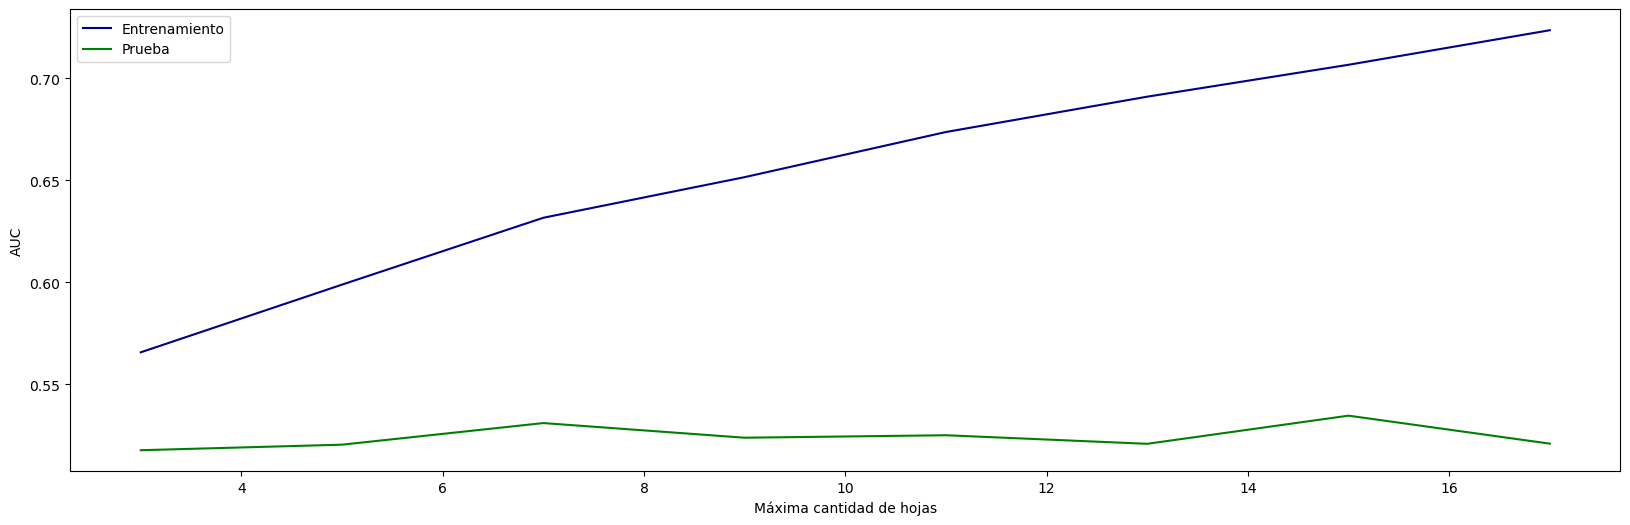

In [245]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize = (20, 6))
sns.lineplot(data = cv_tree_results2, x = "param_max_leaf_nodes", y = "mean_train_score", color = "darkblue", label = "Entrenamiento")
sns.lineplot(data = cv_tree_results2, x = "param_max_leaf_nodes", y = "mean_test_score", color = "green", label = "Prueba")
ax.set_xlabel("Máxima cantidad de hojas")
ax.set_ylabel("AUC")

In [246]:
tree3 = DecisionTreeClassifier(random_state = 123)
grilla_tree3 = {"max_depth": [3, 5, 7, 9, 11, 13, 15, 17],
                "max_leaf_nodes": [3, 5, 7, 9, 11, 13, 15, 17]}
tree_cv3 = GridSearchCV(tree3, grilla_tree3, scoring = "roc_auc", cv = 5, return_train_score = True)
tree_cv3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17],
                         'max_leaf_nodes': [3, 5, 7, 9, 11, 13, 15, 17]},
             return_train_score=True, scoring='roc_auc')

In [247]:
cv_tree_results3 = pd.DataFrame(tree_cv3.cv_results_)
cv_tree_results3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003529,0.001012,0.002206,0.000485,3,3,"{'max_depth': 3, 'max_leaf_nodes': 3}",0.507589,0.528571,0.502681,...,0.517731,0.010527,53,0.590999,0.578157,0.563707,0.559479,0.536317,0.565732,0.018446
1,0.003613,0.000734,0.002721,0.001012,3,5,"{'max_depth': 3, 'max_leaf_nodes': 5}",0.520982,0.535640,0.497692,...,0.519426,0.016214,51,0.620823,0.616710,0.609002,0.583594,0.569261,0.599878,0.020039
2,0.003010,0.001096,0.003019,0.000527,3,7,"{'max_depth': 3, 'max_leaf_nodes': 7}",0.506696,0.526711,0.519136,...,0.521767,0.008656,32,0.639927,0.628165,0.643100,0.609328,0.577598,0.619624,0.024119
3,0.003059,0.000322,0.002200,0.000985,3,9,"{'max_depth': 3, 'max_leaf_nodes': 9}",0.514881,0.529836,0.519136,...,0.524029,0.006481,20,0.646627,0.634912,0.643100,0.609328,0.577598,0.622313,0.025885
4,0.003450,0.000424,0.002616,0.000598,3,11,"{'max_depth': 3, 'max_leaf_nodes': 11}",0.514881,0.529836,0.519136,...,0.524029,0.006481,20,0.646627,0.634912,0.643100,0.609328,0.577598,0.622313,0.025885


Text(0, 0.5, 'AUC')

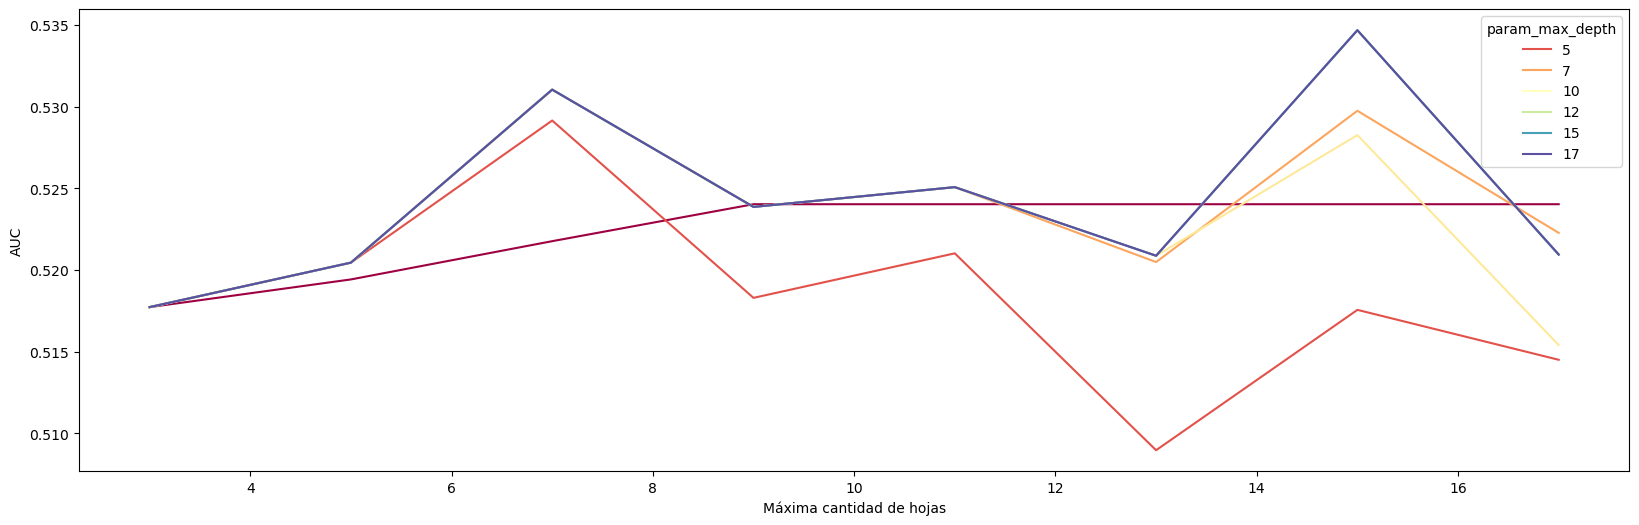

In [248]:
fig, ax = plt.subplots(figsize = (20, 6))
sns.lineplot(data = cv_tree_results3, x = "param_max_leaf_nodes", y = "mean_test_score", hue = "param_max_depth",
             palette = "Spectral")
ax.set_xlabel("Máxima cantidad de hojas")
ax.set_ylabel("AUC")

In [249]:
tree_cv3.best_params_

{'max_depth': 11, 'max_leaf_nodes': 15}

In [257]:
importancia_arbol = pd.DataFrame(tree_cv3.best_estimator_.feature_importances_,
             index = X.columns,
             columns = ["Importancia"]).sort_values("Importancia", ascending = True)

<AxesSubplot:>

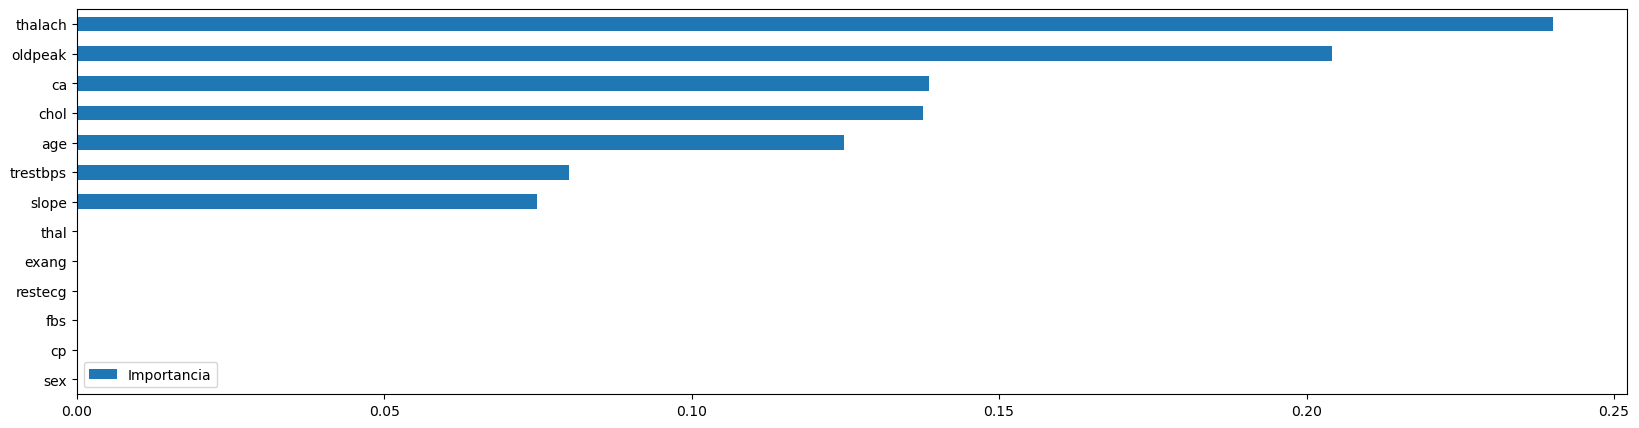

In [258]:
importancia_arbol.plot(kind = "barh", figsize = (20, 5))

In [268]:
from sklearn.metrics import recall_score
y_hat_tree = tree_cv3.predict(X_test)
recall_score(y_test, y_hat_tree)

0.6355140186915887

In [260]:
from sklearn.ensemble import RandomForestClassifier

forest0 = RandomForestClassifier(random_state = 123)
forest0.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [266]:
grilla_rf = {
    "max_depth": [3, 5, 7, 10, None],
    "n_estimators": [10, 100, 200],
    "max_features": [1, 3, 5, 7],
    "min_samples_leaf": [1, 3, 7, 10],
    "min_samples_split": [2, 5, 7]
}

In [262]:
import itertools
keys, values = zip(*grilla_rf.items())
permutations_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]
permutations_dicts

[{'max_depth': 3,
  'n_estimators': 10,
  'max_features': 1,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 3,
  'n_estimators': 10,
  'max_features': 1,
  'min_samples_leaf': 1,
  'min_samples_split': 5},
 {'max_depth': 3,
  'n_estimators': 10,
  'max_features': 1,
  'min_samples_leaf': 1,
  'min_samples_split': 7},
 {'max_depth': 3,
  'n_estimators': 10,
  'max_features': 1,
  'min_samples_leaf': 3,
  'min_samples_split': 2},
 {'max_depth': 3,
  'n_estimators': 10,
  'max_features': 1,
  'min_samples_leaf': 3,
  'min_samples_split': 5},
 {'max_depth': 3,
  'n_estimators': 10,
  'max_features': 1,
  'min_samples_leaf': 3,
  'min_samples_split': 7},
 {'max_depth': 3,
  'n_estimators': 10,
  'max_features': 1,
  'min_samples_leaf': 7,
  'min_samples_split': 2},
 {'max_depth': 3,
  'n_estimators': 10,
  'max_features': 1,
  'min_samples_leaf': 7,
  'min_samples_split': 5},
 {'max_depth': 3,
  'n_estimators': 10,
  'max_features': 1,
  'min_samples_leaf': 7,
  'min_sam

In [267]:
rf1 = RandomForestClassifier(random_state = 123)
rf_cv = GridSearchCV(rf1, grilla_rf, scoring = "recall", return_train_score = True)
rf_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 7, 10],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [10, 100, 200]},
             return_train_score=True, scoring='recall')

In [270]:
rf_cv.best_score_

0.5388607594936708

In [269]:
y_hat_rf = rf_cv.predict(X_test)
recall_score(y_test, y_hat_rf)

0.5420560747663551

In [271]:
grilla_rf2 = {
    "max_depth": list(np.arange(2, 31, step = 2)) + [None],
    "n_estimators": np.arange(50, 500, step = 5),
    "max_features": np.arange(1, 13),
    "min_samples_leaf": np.arange(2, 50, step = 3),
    "min_samples_split": np.arange(2, 50, step = 3)
}

In [272]:
from sklearn.model_selection import RandomizedSearchCV
rf2 = RandomForestClassifier(random_state = 123)
rf_cv = RandomizedSearchCV(rf2, grilla_rf2, n_iter = 100, scoring = "recall", return_train_score = True, 
                           cv = 5, random_state = 123)
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
                   n_iter=100,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, None],
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                                        'min_samples_leaf': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35...
       115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
       180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240,
       245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305,
       310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370,
       375, 380

In [276]:
y_hat_rf = rf_cv.predict(X_test)
recall_score(y_test, y_hat_rf)

0.616822429906542

In [273]:
from xgboost import XGBClassifier

grilla_xgb = {
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1],
    "max_depth": range(3, 21, 3),
    "gamma": [i/10.0 for i in range(0, 5)],
    "colsample_bytree": [i/10.0 for i in range(3, 11)],
    "alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "lambda": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "scale_pos_weight": [1, 0.8, 0.5, 0.3]
}

xgb = XGBClassifier(n_estimators = 500)
xgb_cv = RandomizedSearchCV(xgb, grilla_xgb, n_iter = 200, scoring = "recall", cv = 5, random_state = 123,
                            n_jobs = 12)
xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
           

In [274]:
y_hat_xgb = xgb_cv.predict(X_test)
recall_score(y_test, y_hat_xgb)

0.5700934579439252

In [279]:
y_proba_xgb = xgb_cv.predict_proba(X_test)[:, 1]

In [281]:
from sklearn.metrics import precision_recall_curve
precision1, recall1, thr1 = precision_recall_curve(y_true = y_test, probas_pred = y_proba_xgb)

In [285]:
thr_plot_xgb = pd.DataFrame({"Threshold": thr1, "Recall": recall1[1::], "Precision": precision1[1::]})

Text(0.5, 1.0, 'XGBoost')

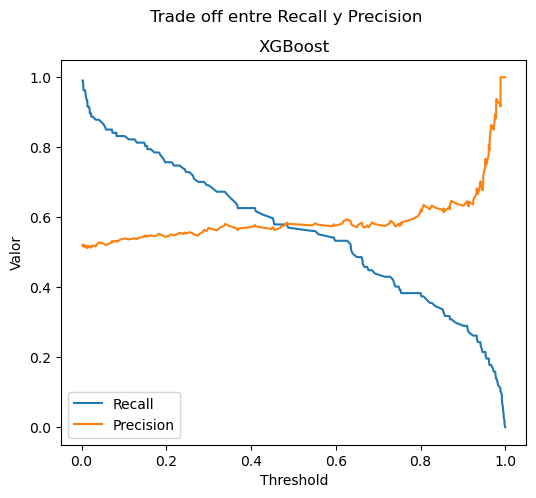

In [286]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.lineplot(data = thr_plot_xgb, x = "Threshold", y = "Recall", ax = ax, label = "Recall")
sns.lineplot(data = thr_plot_xgb, x = "Threshold", y = "Precision", ax = ax, label = "Precision")
ax.legend()
plt.ylabel("Valor")
plt.suptitle("Trade off entre Recall y Precision")
plt.title("XGBoost")

In [288]:
thr_plot_xgb.loc[thr_plot_xgb["Recall"] > 0.8,].sort_values("Precision", ascending = False).head(3)

,Threshold,Recall,Precision
47,0.154127,0.803738,0.547771
45,0.148155,0.813084,0.547170
46,0.149800,0.803738,0.544304
